## Idea: **DataCollector** 

Specify output format & date range and this agent scrapes data for you

* https://data.cdc.gov/browse?sortBy=relevance&pageSize=20 different data sources, might be  interesting for MCP
* https://cmu-delphi.github.io/delphi-epidata/             time series data on influenza/covid/etc.
* https://cmu-delphi.github.io/delphi-epidata/
    * time series data on influenza/covid/etc.
    * but not other data. still might be interesting for MCP?
* what other diseases do we find in data.cdc.gov


I could:
1. find two metrics that work (for the demo)
2. work on a loop

(1) is quicker.

What worked:
- covid 19 hospitalizations in 2025
    - what date range do I get?
- 

In [8]:
!pip install delphi-epidata


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import os
import subprocess
import dotenv
from pathlib import Path

# autoreload any .py scripts
%load_ext autoreload
%autoreload 2

# set the project's root directory as the notebooks' working directory
git_root = subprocess.run(
    ["git", "rev-parse", "--show-toplevel"], capture_output=True, text=True
).stdout.strip()

os.chdir(git_root)
print(git_root)

env_path = Path(git_root, "backend")
print(env_path)

/Users/nilsgandlau/code/aegis-scsp-2025
/Users/nilsgandlau/code/aegis-scsp-2025/backend


In [2]:
# load .env
from dotenv import load_dotenv
load_dotenv()

True

In [33]:
from delphi_epidata import Epidata
import pandas as pd


def fetch_flu_data_2025() -> pd.DataFrame:
    # Set parameters,
    regions = ['nat']
    epiweeks = Epidata.range(202501, 202505)  # Year 2023 weeks 1 to 24

    # Fetch data,
    response = Epidata.fluview(regions, epiweeks)
    # response = Epidata.norostat(regions, epiweeks)

    # Check response status
    if response['result'] != 1:
        raise Exception(f"API request failed: {response['message']}")

    # Convert to DataFrame
    df = pd.DataFrame(response['epidata'])
    return df

# Display first few rows,
print(fetch_flu_data_2025())

  release_date region   issue  epiweek  lag  num_ili  num_patients  \
0   2025-05-30    nat  202521   202501   20   164789       2666902   
1   2025-05-30    nat  202521   202502   19   139867       2635113   
2   2025-05-30    nat  202521   202503   18   156848       2751608   
3   2025-05-30    nat  202521   202504   17   179654       2619694   
4   2025-05-30    nat  202521   202505   16   214953       2890946   

   num_providers  num_age_0  num_age_1 num_age_2  num_age_3  num_age_4  \
0           4231      33437      37589      None      48748      21907   
1           4225      23579      36122      None      42939      19329   
2           4239      25994      50331      None      44135      19139   
3           4244      30177      59311      None      51019      21126   
4           4242      32905      72555      None      60003      26228   

   num_age_5     wili      ili  
0      23108  6.33707  6.17904  
1      17898  5.35991  5.30782  
2      17249  5.76716  5.70023  
3 

In [7]:
import requests, pandas as pd

params = {
    "source"   : "fluview",
    "regions"  : "nat",
    "epiweeks" : "202440-202448",   # same epi‑week range syntax as in the docs
    "format"   : "json"             # response format
}
# resp = requests.get("https://delphi.cmu.edu/epidata/api.php", params=params)
resp = requests.get("https://api.delphi.cmu.edu/epidata/fluview/?regions=nat&epiweeks=201501", params=params)
resp.raise_for_status()
resp.json()

[{'release_date': '2017-10-24',
  'region': 'nat',
  'issue': 201740,
  'epiweek': 201501,
  'lag': 143,
  'num_ili': 31483,
  'num_patients': 771835,
  'num_providers': 1958,
  'num_age_0': 7160,
  'num_age_1': 9589,
  'num_age_2': None,
  'num_age_3': 8072,
  'num_age_4': 3614,
  'num_age_5': 3048,
  'wili': 4.21374,
  'ili': 4.07898},
 {'release_date': '2025-05-30',
  'region': 'nat',
  'issue': 202521,
  'epiweek': 202440,
  'lag': 33,
  'num_ili': 50234,
  'num_patients': 2690750,
  'num_providers': 4242,
  'num_age_0': 10210,
  'num_age_1': 17950,
  'num_age_2': None,
  'num_age_3': 12598,
  'num_age_4': 4708,
  'num_age_5': 4768,
  'wili': 1.95754,
  'ili': 1.86691},
 {'release_date': '2025-05-30',
  'region': 'nat',
  'issue': 202521,
  'epiweek': 202441,
  'lag': 32,
  'num_ili': 52189,
  'num_patients': 2656652,
  'num_providers': 4257,
  'num_age_0': 10789,
  'num_age_1': 18810,
  'num_age_2': None,
  'num_age_3': 12981,
  'num_age_4': 4896,
  'num_age_5': 4713,
  'wili': 2.

In [5]:
resp.json()

[{'release_date': '2025-05-30',
  'region': 'nat',
  'issue': 202521,
  'epiweek': 202440,
  'lag': 33,
  'num_ili': 50234,
  'num_patients': 2690750,
  'num_providers': 4242,
  'num_age_0': 10210,
  'num_age_1': 17950,
  'num_age_2': None,
  'num_age_3': 12598,
  'num_age_4': 4708,
  'num_age_5': 4768,
  'wili': 1.95754,
  'ili': 1.86691},
 {'release_date': '2025-05-30',
  'region': 'nat',
  'issue': 202521,
  'epiweek': 202441,
  'lag': 32,
  'num_ili': 52189,
  'num_patients': 2656652,
  'num_providers': 4257,
  'num_age_0': 10789,
  'num_age_1': 18810,
  'num_age_2': None,
  'num_age_3': 12981,
  'num_age_4': 4896,
  'num_age_5': 4713,
  'wili': 2.07308,
  'ili': 1.96447},
 {'release_date': '2025-05-30',
  'region': 'nat',
  'issue': 202521,
  'epiweek': 202442,
  'lag': 31,
  'num_ili': 53924,
  'num_patients': 2659826,
  'num_providers': 4254,
  'num_age_0': 11027,
  'num_age_1': 19575,
  'num_age_2': None,
  'num_age_3': 13551,
  'num_age_4': 4951,
  'num_age_5': 4820,
  'wili':

In [26]:
from typing import Any
import outlines
from backend.notebooks.utils import search_cdc_datasets, simplify_search_results, call_claude, prompt_review_search_results

## user inpu
disease: str = "covid 19 hospitalizations"
user_query: str = f"looking for data on {disease} in 2025"

## searching CDC datasets
search_query: str = f"{disease}" # can be generated by an LLM
search_results: list[dict[dict[str, Any]]] = search_cdc_datasets(search_query, limit=10)
simplified_search_results: list[dict] = simplify_search_results(search_results)

## Evaluating search results by LLM/AGENT
user_prompt: str = prompt_review_search_results(
    simplified_search_results=simplified_search_results,
    user_query=user_query,
)
# print(user_prompt)
print("--------------------------------")
llm_answer: str = call_claude(user_prompt)
print(llm_answer)

--------------------------------
I'll analyze which datasets can answer the question about COVID-19 hospitalizations in 2025.

* **dataset <id>q3t8-zr7t</id>**: 
  * Contains data on patient care in hospital-based settings for COVID-19
  * Specifically includes data up through December 26, 2023, and is still being updated
  * The "Updated At" date shows 2025-04-21, indicating this dataset is maintained into 2025
  * Provides information on COVID-19 hospital encounters, length of stay, and other hospitalization metrics

* **dataset <id>6jg4-xsqq</id>**: 
  * Provides COVID-19 Hospitalization Surveillance Network (COVID-NET) data
  * "Updated At" date shows 2025-05-29, indicating this dataset is maintained into 2025
  * Contains hospitalization rates and demographic information
  * Shows laboratory-confirmed COVID-19-associated hospitalizations

* **dataset <id>cf5u-bm9w</id>**: 
  * Contains COVID-19 Hospitalization Surveillance Network (COVID-NET) data
  * "Updated At" date shows 2025-

In [27]:
from backend.notebooks.llm_utils import extract_text_inside_xml_tags, extract_xml_tags_from_text
from backend.notebooks.utils import download_dataset, get_llm_digestable_dataset_preview

num_relevant_datasets = len(extract_xml_tags_from_text(llm_answer))
relevant_dataset_ids = extract_text_inside_xml_tags(llm_answer, "id")
print(f"relevant_dataset_ids: {relevant_dataset_ids}")

# download each dataset
example_id = relevant_dataset_ids[0]
example_id = "cf5u-bm9w"
df = download_dataset(example_id)
dataset_preview = get_llm_digestable_dataset_preview(df)
print(dataset_preview)

relevant_dataset_ids: ['q3t8-zr7t', '6jg4-xsqq', 'cf5u-bm9w', 'bigw-pgk2']
| state   | season   |   _yearmonth | agecategory_legend   | sex_label   | race_label   |   monthlyrate | type       |
|---------|----------|--------------|----------------------|-------------|--------------|---------------|------------|
| Utah    | 2021-22  |       202205 | 6mo-<12 months       | All         | All          |          26.5 | Crude Rate |
| Utah    | 2021-22  |       202209 | 6mo-<12 months       | All         | All          |          14.8 | Crude Rate |
| Utah    | 2021-22  |       202204 | 6mo-<12 months       | All         | All          |           0   | Crude Rate |
| Utah    | 2021-22  |       202203 | 6mo-<12 months       | All         | All          |          53   | Crude Rate |
| Utah    | 2021-22  |       202202 | 6mo-<12 months       | All         | All          |          53   | Crude Rate |

|   _yearmonth |   monthlyrate |
|--------------|---------------|
|    1000      |      980

In [28]:
# feed preview of dataset to LLM to see if it can be used for user query
from typing import Literal
from backend.notebooks.utils import prompt_template_check_data_preview


prompt = prompt_template_check_data_preview(dataset_preview=dataset_preview, user_query=user_query)
llm_answer = call_claude(prompt)
llm_short_answer: Literal["yes", "no"] = extract_text_inside_xml_tags(llm_answer, "answer")
print(f"LLM short answer: {llm_short_answer}\n--------------------------------")
print(f"LLM full answer: {llm_answer}")

LLM short answer: ['no']
--------------------------------
LLM full answer: Based on the data preview, I can see this dataset contains:

- State information
- Seasonal data (e.g., "2021-22")
- Month/year information (_yearmonth column, formatted as YYYYMM)
- Age categories
- Sex and race demographics
- Monthly rates of something (possibly hospitalizations)
- Rate type information

Looking at the yearmonth values, I can see data points from what appears to be 2021 (202110, 202112) and 2022 (202202, 202203, 202204, etc.). The most recent data point I can identify is from 2022.

<answer>no</answer>

The dataset does not appear to contain any data from 2025. The most recent timeframe visible in the preview is from 2022 (with values like 202209 representing September 2022). Since 2025 is in the future relative to when this dataset was compiled, there would not be COVID-19 hospitalization data available for that year. The query is asking for future data that cannot exist in this historical da

In [17]:
# preprocess dataset
from backend.notebooks.utils import prompt_template_prep_data


prompt = prompt_template_prep_data(dataset_preview=dataset_preview, user_query=user_query)
llm_answer: str = call_claude(prompt)
print(llm_answer)

```python
# Filter for 2025 data and covid-19 hospitalization information
df_2025 = df[df['weekendingdate'].str.startswith('2025')]

# Extract relevant columns related to COVID-19 hospitalizations
df_clean = df_2025[['weekendingdate', 'totalconfc19hosppats']].copy()

# Rename columns for clarity
df_clean.rename(columns={
    'weekendingdate': 'date',
    'totalconfc19hosppats': 'covid19_hospitalizations'
}, inplace=True)

# Convert date to datetime format for better handling
df_clean['date'] = pd.to_datetime(df_clean['date']).dt.strftime('%Y-%m-%d')

# Sort by date
df_clean = df_clean.sort_values('date')

# Reset index
df_clean.reset_index(drop=True, inplace=True)
```


In [18]:
from backend.notebooks.utils import strip_code_block, execute_code_block

code = strip_code_block(llm_answer)
df_clean   = execute_code_block(code, df)
df_clean.head()

,date,covid19_hospitalizations
0,2025-01-04,2.0
1,2025-01-04,61.0
2,2025-01-04,62.0
3,2025-01-11,155.0
4,2025-01-11,280.0


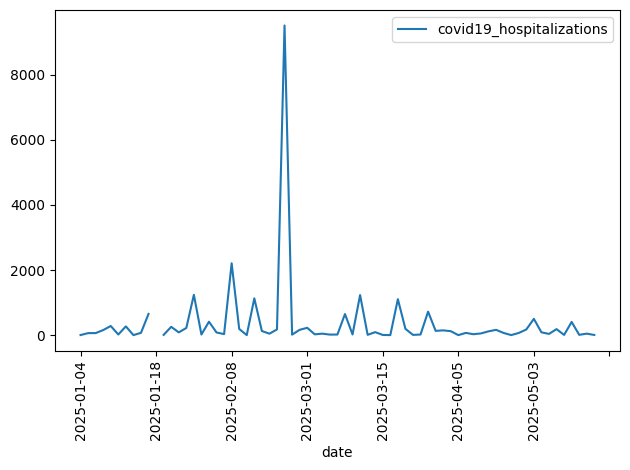

In [23]:
# plot time series
# !pip install matplotlib
from backend.notebooks.utils import plot_time_series


plot_time_series(df_clean, "number of covid 19 cases")

## delphi data

- cds data quality is bad.
- difficult to get 2025 data.
- only possible with more sophisticated agent that searches more extensively.

In [34]:
# !pip install epidatpy

ERROR: Could not find a version that satisfies the requirement epidatpy (from versions: none)
ERROR: No matching distribution found for epidatpy

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [33]:
from epidatpy import CovidcastEpidata, EpiDataContext, EpiRange

# All calls using the `epidata` object will now be cached for 7 days
epidata = EpiDataContext(use_cache=True, cache_max_age_days=7)

# Obtain a DataFrame of the most up-to-date version of the smoothed covid-like illness (CLI)
# signal from the COVID-19 Trends and Impact survey for the US
epidata.pub_covidcast(
    data_source="jhu-csse",
    signals="confirmed_cumulative_num",
    geo_type="nation",
    time_type="day",
    geo_values="us",
    time_values=EpiRange(20210405, 20210410),
).df()

ModuleNotFoundError: No module named 'epidatpy'